<center>
# Final Project Part 2
# Feng Wang
# Gibbs Sampling 

In [254]:
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# 1. Inverse Algorithm and Main function

From the marginal distribution, we have the density function and cumulative function
<center>
    $f(x|y) = \frac{1}{1-e^{-By}}ye^{-yx}$,  $F(x|y) = \frac{1-e^{-yx}}{1-e^{-By}}$,      $x \in [0,B]$  
    $f(y|x) = \frac{1}{1-e^{-Bx}}xe^{-yx}$,  $F(y|x) = \frac{1-e^{-yx}}{1-e^{-Bx}}$,      $y \in [0,B]$  

In [207]:
def Fxy(x, y, B):return (1 - exp(- y * x))/(1 - exp(- B * y))
def Fyx(x, y, B):return (1 - exp(- y * x))/(1 - exp(- B * x))

## Inverse method Algorithm
* ### a. Assign initial value x = 1, y = 1  
* ### b. Generate new x given y, and generate new y given x  
We have a cumulative distribution function, and we need to get a random sample from this distribution. Since the F(x) follows a uniform distribution (0,1), then we get a random number t first. Then, find the root x from F(x) = t. Similarly, we use the same method to get root y
* ### c. Repeat step b iteration times

## Main function

In [208]:
def Invsample(N,thin,B):
    mat = zeros(3 * N).reshape(N,3)
    mat[:, 0] = arange(1,N+1,1)
    x = 1; y = 1; 
    for i in range(0, N):
        for j in range(0, thin):
            x_temp = arange(0.005,B,0.005)
            s1 = random.uniform(0,1)
            temp1 = abs(Fxy(x_temp,y,B)-s1)
            x = x_temp[temp1 == min(temp1)]
            y_temp = arange(0.005,B,0.005)
            s2 = random.uniform(0,1)
            temp2 = abs(Fyx(x,y_temp,B)-s2)
            y = y_temp[temp2 == min(temp2)]
        mat[i, 1 : 3] = [x, y]   
    return(mat)

# 2. Test for different sample sizes

###  B = 5, N = 500 

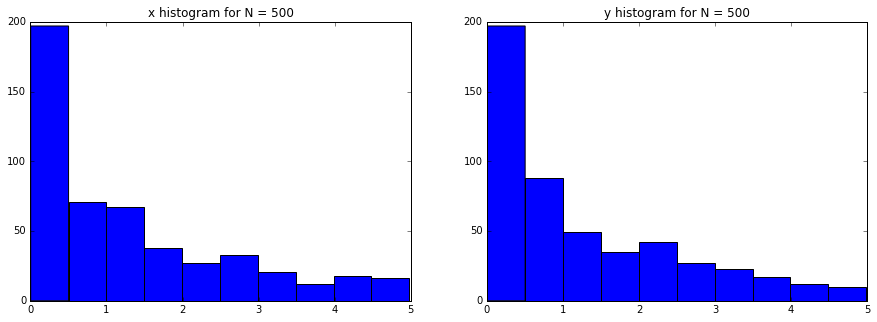

In [238]:
N = 500; thin = 5; B = 5
result1 = Invsample(N,thin,B)
fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.hist(result1[:,1])
plt.title("x histogram for N = 500")
plt.subplot("122")
plt.hist(result1[:,2])
plt.title("y histogram for N = 500")

###  B = 5, N = 5000

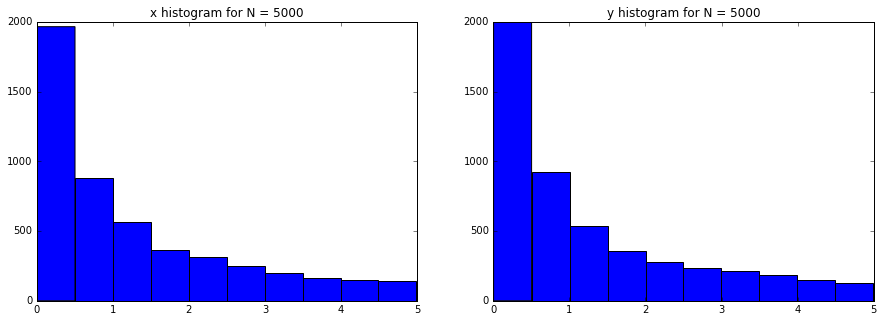

In [239]:
N = 5000; thin = 5; B = 5
result2 = Invsample(N,thin,B)
fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.hist(result2[:,1])
plt.title("x histogram for N = 5000")
plt.subplot("122")
plt.hist(result2[:,2])
plt.title("y histogram for N = 5000")

###  B = 5, N = 50000 

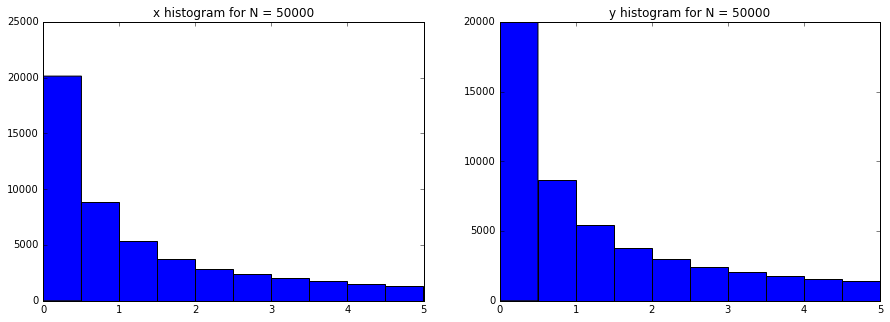

In [240]:
N = 50000; thin = 5; B = 5
result3 = Invsample(N,thin,B)
fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.hist(result3[:,1])
plt.title("x histogram for N = 50000")
plt.subplot("122")
plt.hist(result3[:,2])
plt.title("y histogram for N = 50000")

# 3. Estimate of the Expectation $E_{P(X)}[X]$

In [253]:
e1 = result1[:,1]; e2 = result2[:,1]; e3 = result3[:,1]
print "N = 500",'The estimate of the Expectation is', mean(e1)
print "N = 5000",'The estimate of the Expectation is', mean(e2)
print "N = 50000",'The estimate of the Expectation is', mean(e3)

N = 500 The estimate of the Expectation is 1.30432
N = 5000 The estimate of the Expectation is 1.269201
N = 50000 The estimate of the Expectation is 1.2535886
